# Matrix Loan Dataset Explanatory Analysis

*The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Matrix rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc.*

In [303]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 

In [228]:
df = pd.read_csv('prosperLoanData.csv')

In [229]:
loan = df.copy()

In [230]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Data Assessing and Cleaning

1. filter important features column
2. drop duplicated rows based on listing number
3. convert datatypes of TotalTrades and TotalInquiries to int , ListingCreationDate to datetime
4. removed rows without ProsperRating
5. fill in missing values of occupation and DebtToIncomeRatio

### *Filtering the data to select columns of feature interest*

In [231]:
loan = loan.filter(['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 'ProsperRating (numeric)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors'])

In [232]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  ProsperRating (numeric)    84853 non-null   float64
 11  Occupation                 110349 non-null  object 
 12  Term                       113937 non-null  int64  
 13  EmploymentStatus           11

### *Dropping all duplicated rows in the dataset*

In [233]:
loan = loan.drop_duplicates()

### *Getting the statistical distribution of the numerical columns in the data set*

In [234]:
loan.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (numeric),Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
count,1.130660e+05,113066.000000,113066.000000,113041.000000,113066.000000,1.130660e+05,83982.000000,113066.000000,111907.000000,104594.000000,113066.000000,105522.000000,113066.000000
mean,6.248036e+05,8314.762307,2.776838,0.218980,0.192946,5.605120e+03,4.068705,40.800170,5.590812,0.276032,271.932742,23.221518,80.876143
std,3.273262e+05,6237.007841,3.998188,0.080483,0.074917,7.495596e+03,1.675442,10.421518,6.446342,0.553738,192.549979,11.875303,103.340277
min,4.000000e+00,1000.000000,0.000000,0.006530,0.000000,0.000000e+00,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.976670e+05,4000.000000,1.000000,0.156290,0.134000,3.199396e+03,3.000000,36.000000,2.000000,0.140000,130.950000,15.000000,2.000000
50%,5.978385e+05,6300.000000,1.000000,0.209840,0.184000,4.666667e+03,4.000000,36.000000,4.000000,0.220000,217.370000,22.000000,44.000000
75%,8.849650e+05,12000.000000,3.000000,0.283860,0.250600,6.824688e+03,5.000000,36.000000,7.000000,0.320000,370.570000,30.000000,116.000000
max,1.255725e+06,35000.000000,20.000000,0.512290,0.497500,1.750003e+06,7.000000,60.000000,379.000000,10.010000,2251.510000,126.000000,1189.000000


###  *Visualizing the first 5 columns of the data set*


In [235]:
loan.head()

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
0,193129,2007-08-26 19:09:29.263000000,9425,Completed,0,CO,0.16516,0.1580,3083.333333,NaN,NaN,Other,36,Self-employed,3.0,0.17,330.43,11.0,258
1,1209647,2014-02-27 08:28:07.900000000,10000,Current,2,CO,0.12016,0.0920,6125.000000,A,6.0,Professional,36,Employed,5.0,0.18,318.93,29.0,1
2,81716,2007-01-05 15:00:47.090000000,3001,Completed,0,GA,0.28269,0.2750,2083.333333,NaN,NaN,Other,36,Not available,1.0,0.06,123.32,NaN,41
3,658116,2012-10-22 11:02:35.010000000,10000,Current,16,GA,0.12528,0.0974,2875.000000,A,6.0,Skilled Labor,36,Employed,1.0,0.15,321.45,26.0,158
4,909464,2013-09-14 18:38:39.097000000,15000,Current,2,MN,0.24614,0.2085,9583.333333,D,3.0,Executive,36,Employed,9.0,0.26,563.97,39.0,20


### *Randomly visualizing 10 colums in the data set*

In [236]:
loan.sample(10)

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
100475,1192046,2014-02-13 16:24:01.530000000,15000,Current,1,TX,0.13836,0.1099,12316.666667,A,6.0,Engineer - Mechanical,36,Employed,7.0,0.24,491.01,35.0,1
50799,1238172,2014-02-26 19:06:14.007000000,15000,Current,1,IL,0.17710,0.1535,7083.333333,C,4.0,Other,60,Employed,2.0,0.09,359.61,28.0,1
22105,375415,2008-07-30 10:15:27.317000000,3500,Completed,1,CT,0.37453,0.3500,1333.333333,NaN,NaN,Food Service,36,Full-time,24.0,0.17,158.33,14.0,28
25428,1140691,2014-01-31 15:07:45.957000000,10950,Current,1,MA,0.21648,0.1795,4750.000000,C,4.0,Teacher,36,Employed,4.0,0.29,395.59,20.0,1
40739,1209396,2014-02-15 06:55:58.690000000,12042,Current,1,AL,0.24603,0.2080,6000.000000,D,3.0,Professional,36,Employed,2.0,0.27,452.45,18.0,36
74985,542716,2011-12-05 04:43:45.817000000,25000,Current,3,FL,0.14358,0.1154,16666.666667,A,6.0,Sales - Commission,36,Employed,3.0,0.07,824.88,7.0,281
79737,1180321,2014-02-24 12:14:08.787000000,4700,Current,1,IL,0.13734,0.1089,3916.666667,A,6.0,Other,36,Employed,0.0,0.22,153.63,15.0,33
68535,750025,2013-04-11 05:41:29.333000000,3900,Current,1,CT,0.31032,0.2712,8000.000000,E,2.0,Analyst,36,Employed,9.0,0.25,159.47,25.0,1
14266,482441,2010-11-01 16:16:40.817000000,3000,Chargedoff,7,CA,0.38723,0.3500,1666.666667,HR,1.0,Other,36,Self-employed,6.0,NaN,135.71,21.0,88
49005,529460,2011-09-26 10:09:59.850000000,2000,Completed,3,MO,0.34621,0.3099,5000.000000,E,2.0,Realtor,36,Employed,6.0,NaN,85.99,19.0,27


### *Duplicating the loan datase and assigning it to a variable loan_df*

In [329]:
loan_df = loan.copy()

### *Filling the NaN values in TotalTrades and TotalInquiries column with Zero so it can be converted to an int data type*

In [238]:
loan.TotalTrades = loan.TotalTrades.fillna(0).astype(int)
loan.TotalInquiries = loan.TotalInquiries.fillna(0).astype(int)

### *Converting the ListingCreationDate from object data types to datetime and then spliting the values into month and year*

In [277]:
loan.ListingCreationDate = pd.to_datetime(loan.ListingCreationDate)

In [332]:
loan_df['year'] = pd.DatetimeIndex(loan_df.ListingCreationDate).year
loan_df['month'] = pd.DatetimeIndex(loan_df.ListingCreationDate).month
# loan_df['day'] = pd.DatetimeIndex(loan_df.ListingCreationDate).day
# loan_df['time'] = pd.DatetimeIndex(loan_df.ListingCreationDate).time

### *Dropping the dafault ListingCreationDate column*

In [333]:
loan_df.drop(columns = ['ListingCreationDate'], inplace=True)

In [351]:
loan_df

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month
0,193129,9425,Completed,0,CO,0.16516,0.1580,3083.333333,NaN,NaN,Other,36,Self-employed,3,0.17,330.43,11,258,2007,Aug
1,1209647,10000,Current,2,CO,0.12016,0.0920,6125.000000,A,6.0,Professional,36,Employed,5,0.18,318.93,29,1,2014,Feb
2,81716,3001,Completed,0,GA,0.28269,0.2750,2083.333333,NaN,NaN,Other,36,Not available,1,0.06,123.32,0,41,2007,Jan
3,658116,10000,Current,16,GA,0.12528,0.0974,2875.000000,A,6.0,Skilled Labor,36,Employed,1,0.15,321.45,26,158,2012,Oct
4,909464,15000,Current,2,MN,0.24614,0.2085,9583.333333,D,3.0,Executive,36,Employed,9,0.26,563.97,39,20,2013,Sept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,10000,Current,1,IL,0.22354,0.1864,4333.333333,C,4.0,Food Service Management,36,Employed,0,0.13,364.74,37,1,2013,Apr
113933,537216,2000,FinalPaymentInProgress,7,PA,0.13220,0.1110,8041.666667,A,6.0,Professional,36,Employed,4,0.11,65.57,39,22,2011,Nov
113934,1069178,10000,Current,1,TX,0.23984,0.2150,2875.000000,D,3.0,Other,60,Employed,2,0.51,273.35,25,119,2013,Dec
113935,539056,15000,Completed,2,GA,0.28408,0.2605,3875.000000,C,4.0,Food Service,60,Full-time,4,0.48,449.55,19,274,2011,Nov


### *Replacing numerical values of month with month names for clarity in analysis*

In [335]:
loan_df.month.replace([1,2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)


In [336]:
loan_df = loan_df.copy()

In [337]:
loan_df

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month
0,193129,9425,Completed,0,CO,0.16516,0.1580,3083.333333,NaN,NaN,Other,36,Self-employed,3,0.17,330.43,11,258,2007,Aug
1,1209647,10000,Current,2,CO,0.12016,0.0920,6125.000000,A,6.0,Professional,36,Employed,5,0.18,318.93,29,1,2014,Feb
2,81716,3001,Completed,0,GA,0.28269,0.2750,2083.333333,NaN,NaN,Other,36,Not available,1,0.06,123.32,0,41,2007,Jan
3,658116,10000,Current,16,GA,0.12528,0.0974,2875.000000,A,6.0,Skilled Labor,36,Employed,1,0.15,321.45,26,158,2012,Oct
4,909464,15000,Current,2,MN,0.24614,0.2085,9583.333333,D,3.0,Executive,36,Employed,9,0.26,563.97,39,20,2013,Sept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,10000,Current,1,IL,0.22354,0.1864,4333.333333,C,4.0,Food Service Management,36,Employed,0,0.13,364.74,37,1,2013,Apr
113933,537216,2000,FinalPaymentInProgress,7,PA,0.13220,0.1110,8041.666667,A,6.0,Professional,36,Employed,4,0.11,65.57,39,22,2011,Nov
113934,1069178,10000,Current,1,TX,0.23984,0.2150,2875.000000,D,3.0,Other,60,Employed,2,0.51,273.35,25,119,2013,Dec
113935,539056,15000,Completed,2,GA,0.28408,0.2605,3875.000000,C,4.0,Food Service,60,Full-time,4,0.48,449.55,19,274,2011,Nov


### *Selecting rows only where value is not null as this is one of the most important features of the dataset .*

In [352]:
loan_df = loan_df.dropna()

In [291]:
loan_df

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month
1,1209647,10000,Current,2,CO,0.12016,0.0920,6125.000000,A,6.0,Professional,36,Employed,5,0.18,318.93,29,1,2014,Feb
3,658116,10000,Current,16,GA,0.12528,0.0974,2875.000000,A,6.0,Skilled Labor,36,Employed,1,0.15,321.45,26,158,2012,Oct
4,909464,15000,Current,2,MN,0.24614,0.2085,9583.333333,D,3.0,Executive,36,Employed,9,0.26,563.97,39,20,2013,Sept
5,1074836,15000,Current,1,NM,0.15425,0.1314,8333.333333,B,5.0,Professional,60,Employed,2,0.36,342.37,47,1,2013,Dec
6,750899,3000,Current,1,KS,0.31032,0.2712,2083.333333,E,2.0,Sales - Retail,36,Employed,0,0.27,122.67,16,1,2013,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,10000,Current,1,IL,0.22354,0.1864,4333.333333,C,4.0,Food Service Management,36,Employed,0,0.13,364.74,37,1,2013,Apr
113933,537216,2000,FinalPaymentInProgress,7,PA,0.13220,0.1110,8041.666667,A,6.0,Professional,36,Employed,4,0.11,65.57,39,22,2011,Nov
113934,1069178,10000,Current,1,TX,0.23984,0.2150,2875.000000,D,3.0,Other,60,Employed,2,0.51,273.35,25,119,2013,Dec
113935,539056,15000,Completed,2,GA,0.28408,0.2605,3875.000000,C,4.0,Food Service,60,Full-time,4,0.48,449.55,19,274,2011,Nov


### *Filling missing values for the Occupation as unknown*

In [296]:
#Making a copy of my data set to aviod error when carrying out computation in the future.
loan_df = loan_df.copy()

In [294]:
loan_df.Occupation = loan_df.Occupation.fillna('Unknown')

In [297]:
loan_df.Occupation.value_counts()

Other                          18329
Professional                    9831
Executive                       3179
Computer Programmer             3004
Teacher                         2747
                               ...  
Student - College Junior          18
Student - College Freshman        12
Student - College Sophomore        9
Student - Community College        5
Student - Technical School         1
Name: Occupation, Length: 68, dtype: int64

### *Filling missing values for the DebitToIncomeRatio to the mean of DebitToIncomeRatio.*

In [298]:
loan_df.DebtToIncomeRatio = loan_df.DebtToIncomeRatio.fillna(loan_df.DebtToIncomeRatio.mean())

In [299]:
loan_df.sample(15)

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month
83111,511938,10000,Current,2,IL,0.16289,0.1490,5000.000000,A,6.0,Other,60,Employed,12,0.06,237.37,8,149,2011,Jun
79192,990094,5000,Current,1,AL,0.10038,0.0869,6721.333333,AA,7.0,Accountant/CPA,36,Employed,3,0.19,158.28,32,1,2013,Nov
103967,479461,2000,Chargedoff,1,GA,0.36472,0.3280,2145.833333,E,2.0,Teacher,36,Employed,2,0.30,88.00,13,67,2010,Oct
12540,554584,6500,Current,1,CA,0.24246,0.2049,4940.000000,C,4.0,Construction,36,Employed,6,0.18,243.19,23,126,2012,Jan
79654,632565,11500,Current,2,MS,0.24758,0.2099,5103.666667,C,4.0,Civil Service,36,Employed,1,0.17,433.20,19,23,2012,Sept
64486,508634,2000,Completed,6,FL,0.30532,0.2699,1324.500000,D,3.0,Other,36,Other,4,0.16,81.64,12,6,2011,May
6053,993240,4000,Current,1,MI,0.23540,0.1980,1708.916667,C,4.0,Unknown,36,Other,4,0.34,148.25,29,1,2013,Oct
96062,422505,15000,Chargedoff,3,CO,0.25836,0.2355,5375.000000,C,4.0,Computer Programmer,36,Full-time,3,0.35,584.95,17,644,2009,Sept
21524,1135263,5000,Current,1,NV,0.32446,0.2850,2833.333333,E,2.0,Clerical,36,Employed,5,0.49,208.17,12,1,2014,Jan
49861,609782,2000,Current,1,FL,0.14328,0.1151,2416.666667,A,6.0,Other,36,Employed,2,0.18,65.96,24,47,2012,Jul


In [300]:
loan_df.describe(include=['O'])

,LoanStatus,BorrowerState,ProsperRating (Alpha),Occupation,EmploymentStatus,month
count,76768,76768,76768,76768,76768,76768
unique,11,48,7,68,7,12
top,Current,CA,C,Other,Employed,Jan
freq,51712,9633,16671,18329,65160,8202


In [301]:
loan_df.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (numeric),Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year
count,7.676800e+04,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000
mean,7.761845e+05,9248.961416,3.293143,0.223978,0.193653,5964.256138,4.129025,42.701230,4.329643,0.258692,295.275039,24.184595,69.651092,2012.342213
std,2.354251e+05,6389.782292,4.389691,0.079291,0.074018,5089.682309,1.660870,11.710835,3.841802,0.319727,189.109061,11.611000,97.561728,1.195847
min,4.162750e+05,1000.000000,0.000000,0.045830,0.040000,0.250000,1.000000,12.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2009.000000
25%,5.613232e+05,4000.000000,1.000000,0.162590,0.134900,3528.895834,3.000000,36.000000,2.000000,0.150000,158.330000,16.000000,1.000000,2012.000000
50%,7.458110e+05,8000.000000,1.000000,0.215660,0.184500,5000.000000,4.000000,36.000000,3.000000,0.220000,256.120000,23.000000,31.000000,2013.000000
75%,9.794395e+05,14000.000000,3.000000,0.287800,0.254900,7166.666667,5.000000,60.000000,6.000000,0.320000,392.010000,31.000000,99.000000,2013.000000
max,1.255149e+06,35000.000000,20.000000,0.423950,0.360000,483333.333333,7.000000,60.000000,78.000000,10.010000,2251.510000,122.000000,1189.000000,2014.000000


In [96]:
pip install --q pingouin

Note: you may need to restart the kernel to use updated packages.


In [641]:
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
import pingouin as pg


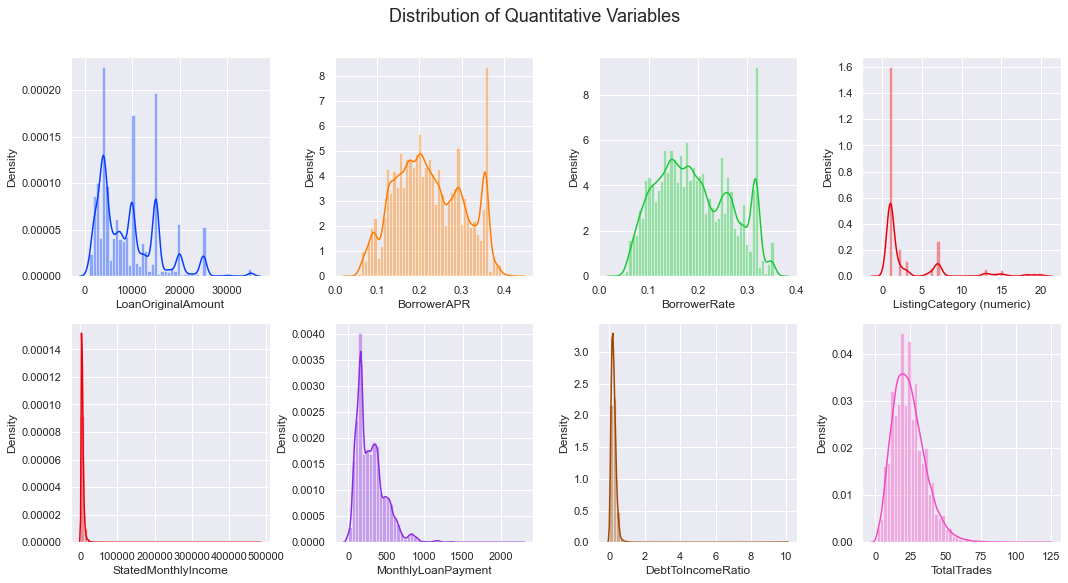

In [304]:
sns.set(color_codes=True)
color = sns.color_palette('bright')

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

sns.distplot(loan_df['LoanOriginalAmount'], color=color[0], ax=axes[0,0])
sns.distplot(loan_df['BorrowerAPR'], color=color[1], ax=axes[0,1])
sns.distplot(loan_df['BorrowerRate'], color=color[2], ax=axes[0,2])
sns.distplot(loan_df['ListingCategory (numeric)'], color=color[3], ax=axes[0,3])
sns.distplot(loan_df['StatedMonthlyIncome'], color=color[3], ax=axes[1,0])
sns.distplot(loan_df['MonthlyLoanPayment'], color=color[4], ax=axes[1,1])
sns.distplot(loan_df['DebtToIncomeRatio'], color=color[5], ax=axes[1,2])
sns.distplot(loan_df['TotalTrades'], color=color[6], ax=axes[1,3])

plt.suptitle('Distribution of Quantitative Variables', y=1.01, size=18)
plt.tight_layout()

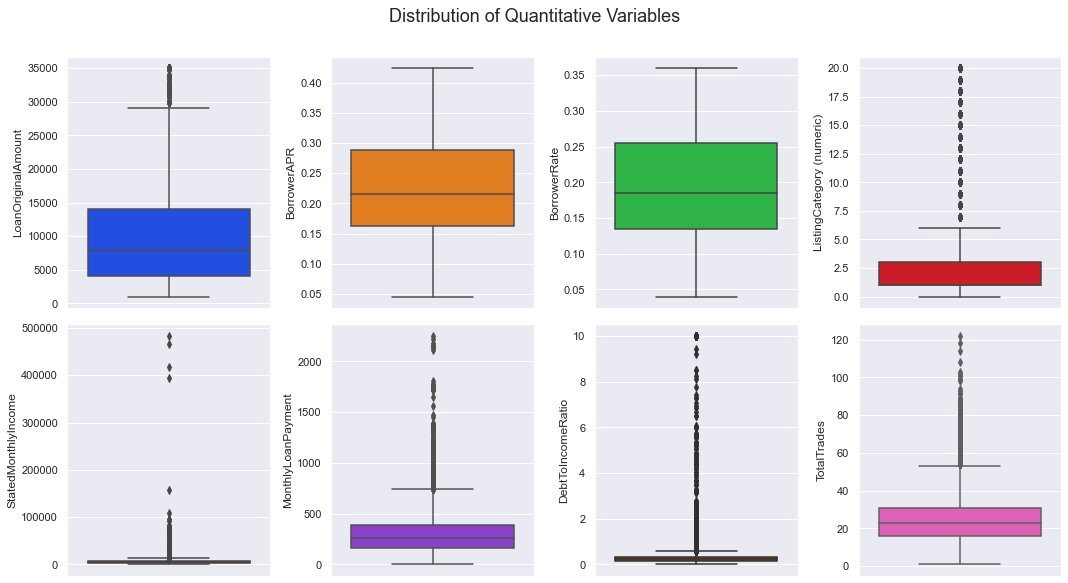

In [305]:
sns.set(color_codes=True)
color = sns.color_palette('bright')

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

sns.boxplot(y=loan_df['LoanOriginalAmount'], color=color[0], ax=axes[0,0])
sns.boxplot(y=loan_df['BorrowerAPR'], color=color[1], ax=axes[0,1])
sns.boxplot(y=loan_df['BorrowerRate'], color=color[2], ax=axes[0,2])
sns.boxplot(y=loan_df['ListingCategory (numeric)'], color=color[3], ax=axes[0,3])
sns.boxplot(y=loan_df['StatedMonthlyIncome'], color=color[3], ax=axes[1,0])
sns.boxplot(y=loan_df['MonthlyLoanPayment'], color=color[4], ax=axes[1,1])
sns.boxplot(y=loan_df['DebtToIncomeRatio'], color=color[5], ax=axes[1,2])
sns.boxplot(y=loan_df['TotalTrades'], color=color[6], ax=axes[1,3])

plt.suptitle('Distribution of Quantitative Variables', y=1.01, size=18)
plt.tight_layout()

In [306]:
loan_df.loc[(loan_df.StatedMonthlyIncome > 1000000)]

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month


### Observation:

- Analyzing the SlatedMonthlyIncome distribution, it seems that the maximum payment is 1.750003e+06 which seems kind of an outlier but further investgation needs to be carried out to ensure that the figure is accurate.

In [307]:
# Computing the Correlation Coefficient of the matrix loan data and visualizing corr
corr = loan_df.corr()
corr

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (numeric),Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year
ListingNumber,1.000000,0.328825,-0.129278,-0.282991,-0.299203,0.045280,0.182826,0.189766,-0.007605,0.013000,0.270355,0.066942,-0.307082,0.883190
LoanOriginalAmount,0.328825,1.000000,-0.204240,-0.418336,-0.405568,0.299582,0.420365,0.338900,-0.041980,-0.017957,0.917504,0.156275,0.321758,0.334955
ListingCategory (numeric),-0.129278,-0.204240,1.000000,0.104146,0.098806,-0.020699,-0.089607,-0.065307,0.011903,-0.041088,-0.189532,-0.093279,-0.046290,-0.066713
BorrowerAPR,-0.282991,-0.418336,0.104146,1.000000,0.993430,-0.156880,-0.962479,-0.056782,0.192114,0.128858,-0.317203,-0.055151,-0.272681,-0.218969
BorrowerRate,-0.299203,-0.405568,0.098806,0.993430,1.000000,-0.154963,-0.953475,0.010154,0.191510,0.126470,-0.326451,-0.053052,-0.249519,-0.240831
StatedMonthlyIncome,0.045280,0.299582,-0.020699,-0.156880,-0.154963,1.000000,0.160661,0.019593,0.112675,-0.140476,0.297752,0.215038,0.123011,0.048400
ProsperRating (numeric),0.182826,0.420365,-0.089607,-0.962479,-0.953475,0.160661,1.000000,0.068447,-0.204804,-0.135336,0.324569,0.049440,0.315463,0.147028
Term,0.189766,0.338900,-0.065307,-0.056782,0.010154,0.019593,0.068447,1.000000,-0.022201,-0.000125,0.056959,0.057449,0.007485,0.246138
TotalInquiries,-0.007605,-0.041980,0.011903,0.192114,0.191510,0.112675,-0.204804,-0.022201,1.000000,-0.026033,-0.016428,0.211223,-0.050182,-0.028882
DebtToIncomeRatio,0.013000,-0.017957,-0.041088,0.128858,0.126470,-0.140476,-0.135336,-0.000125,-0.026033,1.000000,0.000936,0.079334,-0.037738,0.024905


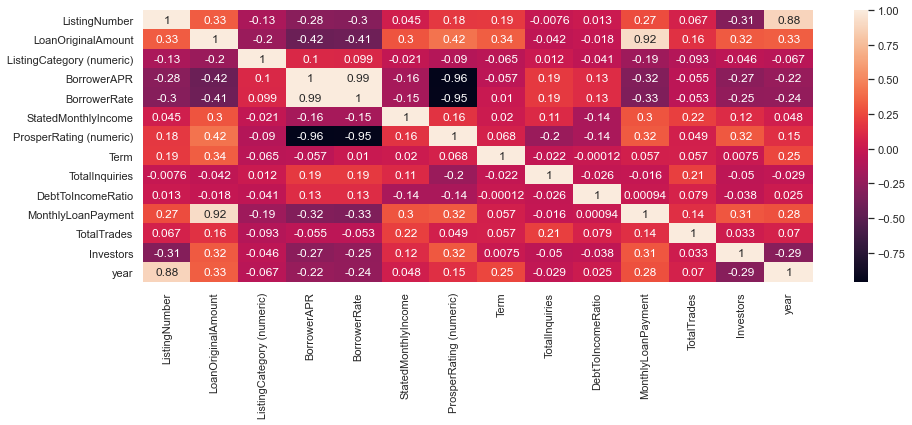

In [308]:
#Visualizing the correlation coeffiecient using a heatmap

fig = plt.figure(figsize=[15, 5])
sns.heatmap(corr, annot=True)

plt.show()

### Observation:

- It is observed that LoanOriginalAmount and MonthlyLoanPayment have a strong positive correlation which means that the higher the original loan amount, the higher the monthly loan payment.


- The Borrower's Annual Percentage Rate (APR) and the Borrower's interest rate have a moderate negative correlation. The amount of BorrowerAPR and BorrowerRate increase or decrease depending on the original loan amount.


- The Borrower's Annual Percentage Rate (APR) and the Borrower's interest rate have a strong positive correlation. The higher the Borrower's interest rate, the higher the Borrower's Annual Percentage Rate (APR).

In [32]:
#!pip install --q fitter

In [33]:
#from fitter import Fitter

In [34]:
#f = Fitter(loan_df.MonthlyLoanPayment)

In [99]:
#f.fit()

,sumsquare_error,aic,bic,kl_div
exponnorm,0.000013,2117.543012,-1.897926e+06,inf
skewnorm,0.000013,2994.216485,-1.895449e+06,inf
johnsonsb,0.000014,2313.449266,-1.892325e+06,inf
fatiguelife,0.000014,2045.505748,-1.890841e+06,inf
chi2,0.000014,2401.011429,-1.888932e+06,inf


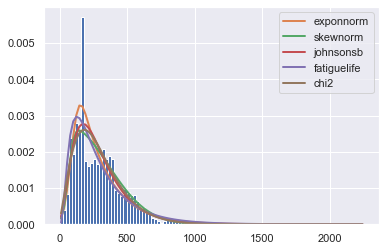

In [36]:
f.summary()

In [100]:
loan_df.sample(10)

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month
82191,1229886,5000,Current,1,MD,0.17198,0.1485,6591.666667,B,Unknown,60,Other,1,0.180000,118.56,27,1,2014,Feb
44540,523639,4000,Completed,1,CA,0.35643,0.3199,1500.000000,E,Skilled Labor,36,Self-employed,2,0.258692,174.20,18,5,2011,Aug
66703,609003,10000,Completed,2,CO,0.28851,0.2499,14166.666667,D,Executive,36,Employed,13,0.160000,397.55,13,22,2012,Jul
2559,828761,15000,Current,1,AL,0.13697,0.1089,11083.333333,A,Accountant/CPA,36,Employed,4,0.170000,490.30,39,1,2013,Jul
77450,869434,10000,Current,1,WA,0.18214,0.1459,9250.000000,B,Fireman,36,Employed,4,0.310000,344.65,20,91,2013,Aug
16484,846783,4000,Past Due (61-90 days),1,KS,0.31293,0.2862,1750.000000,E,Other,60,Other,3,0.570000,126.04,33,1,2013,Jul
88545,531574,6500,Current,3,MI,0.35244,0.3160,2916.666667,E,Executive,36,Self-employed,1,0.258692,281.66,8,79,2011,Oct
74934,874588,4000,Current,2,NY,0.26528,0.2272,2500.000000,D,Food Service Management,36,Employed,4,0.280000,154.26,21,14,2013,Aug
32149,1227225,35000,Current,1,NC,0.15868,0.1355,9750.000000,B,Professional,60,Employed,1,0.230000,806.25,32,1,2014,Feb
71820,690881,15000,Current,1,HI,0.25013,0.2124,7250.000000,C,Military Enlisted,36,Employed,5,0.270000,566.98,21,262,2012,Dec


In [309]:
loan_df.LoanStatus.value_counts()

Current                   51712
Completed                 17691
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        716
Past Due (31-60 days)       325
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       242
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

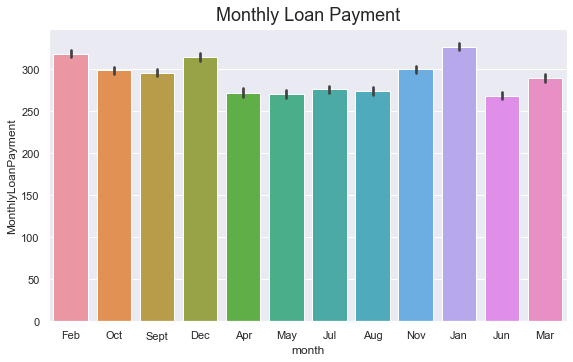

In [310]:
plt.figure(figsize=[8, 5])
plt.title("Monthly Loan Payment", y=1.01, size=18)
plt.tight_layout()

# sns.set(color_codes=True)
# colors = sns.color_palette('bright')

sns.barplot(x='month', y='MonthlyLoanPayment', data=loan_df);

### Observation:

- January has the highest amount of monthly loan payment, followed by February, March, September, October, and December while April, May, June, July and August.


- The reason behind theincreased monthly payment above is because January, October, December, November and february has the highest number of people applying for loan while March, April, May and June have the lowest.

In [311]:
loan_df.month.value_counts()

Jan     8202
Oct     7869
Dec     7532
Nov     7483
Feb     7184
Sept    6952
Jul     6115
Aug     5877
Jun     5293
May     4966
Mar     4856
Apr     4439
Name: month, dtype: int64

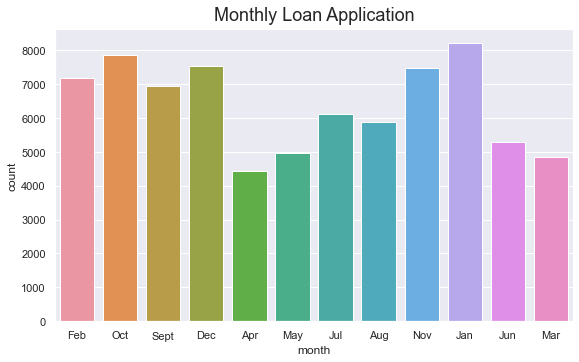

In [312]:
plt.figure(figsize=[8, 5])
plt.title("Monthly Loan Application", y=1.01, size=18)
plt.tight_layout()


sns.countplot(x='month', data=loan_df);

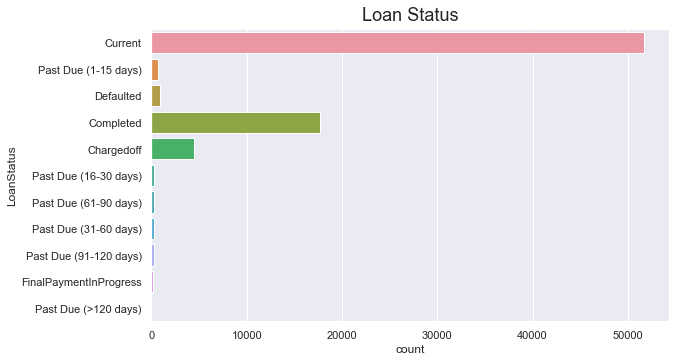

In [313]:
plt.figure(figsize=[8, 5])
plt.title("Loan Status", y=1.01, size=18)
plt.tight_layout()


sns.countplot(y='LoanStatus', data=loan_df);

In [177]:
loan_df.sample(10)

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month
94437,489482,2000,Completed,3,IN,0.34887,0.3125,5000.000000,HR,Professional,36,Full-time,2,0.18,86.28,32,12,2010,Dec
97496,746349,15000,Current,2,PA,0.21025,0.1734,10416.666667,C,Other,36,Employed,4,0.26,537.33,27,1,2013,Apr
55617,784921,15000,Current,1,PA,0.21434,0.1774,4583.333333,C,Professional,36,Employed,0,0.32,540.33,38,200,2013,May
107902,950984,25000,Completed,2,MD,0.18555,0.1620,10000.000000,B,Civil Service,60,Employed,6,0.13,610.61,39,2,2013,Oct
105288,431362,2500,Chargedoff,7,TN,0.22338,0.2010,5741.666667,C,Other,36,Full-time,2,0.27,93.04,43,79,2009,Nov
104261,796868,15000,Current,1,AR,0.24282,0.2179,4250.000000,C,Other,60,Employed,0,0.22,412.49,16,138,2013,Jun
81564,513139,11000,Current,1,MS,0.29371,0.2699,4580.833333,D,Teacher,60,Employed,3,0.28,335.82,22,39,2011,Jun
35520,584043,12000,Current,2,TN,0.25259,0.2148,9950.000000,C,Other,36,Employed,3,0.34,455.06,37,176,2012,Apr
40889,796812,4000,Current,1,OH,0.30285,0.2639,5833.333333,E,Other,36,Employed,2,0.25,161.99,23,1,2013,Jun
54805,868095,2000,Current,13,NY,0.35356,0.3134,7500.000000,HR,Other,36,Retired,7,0.51,86.38,51,6,2013,Aug


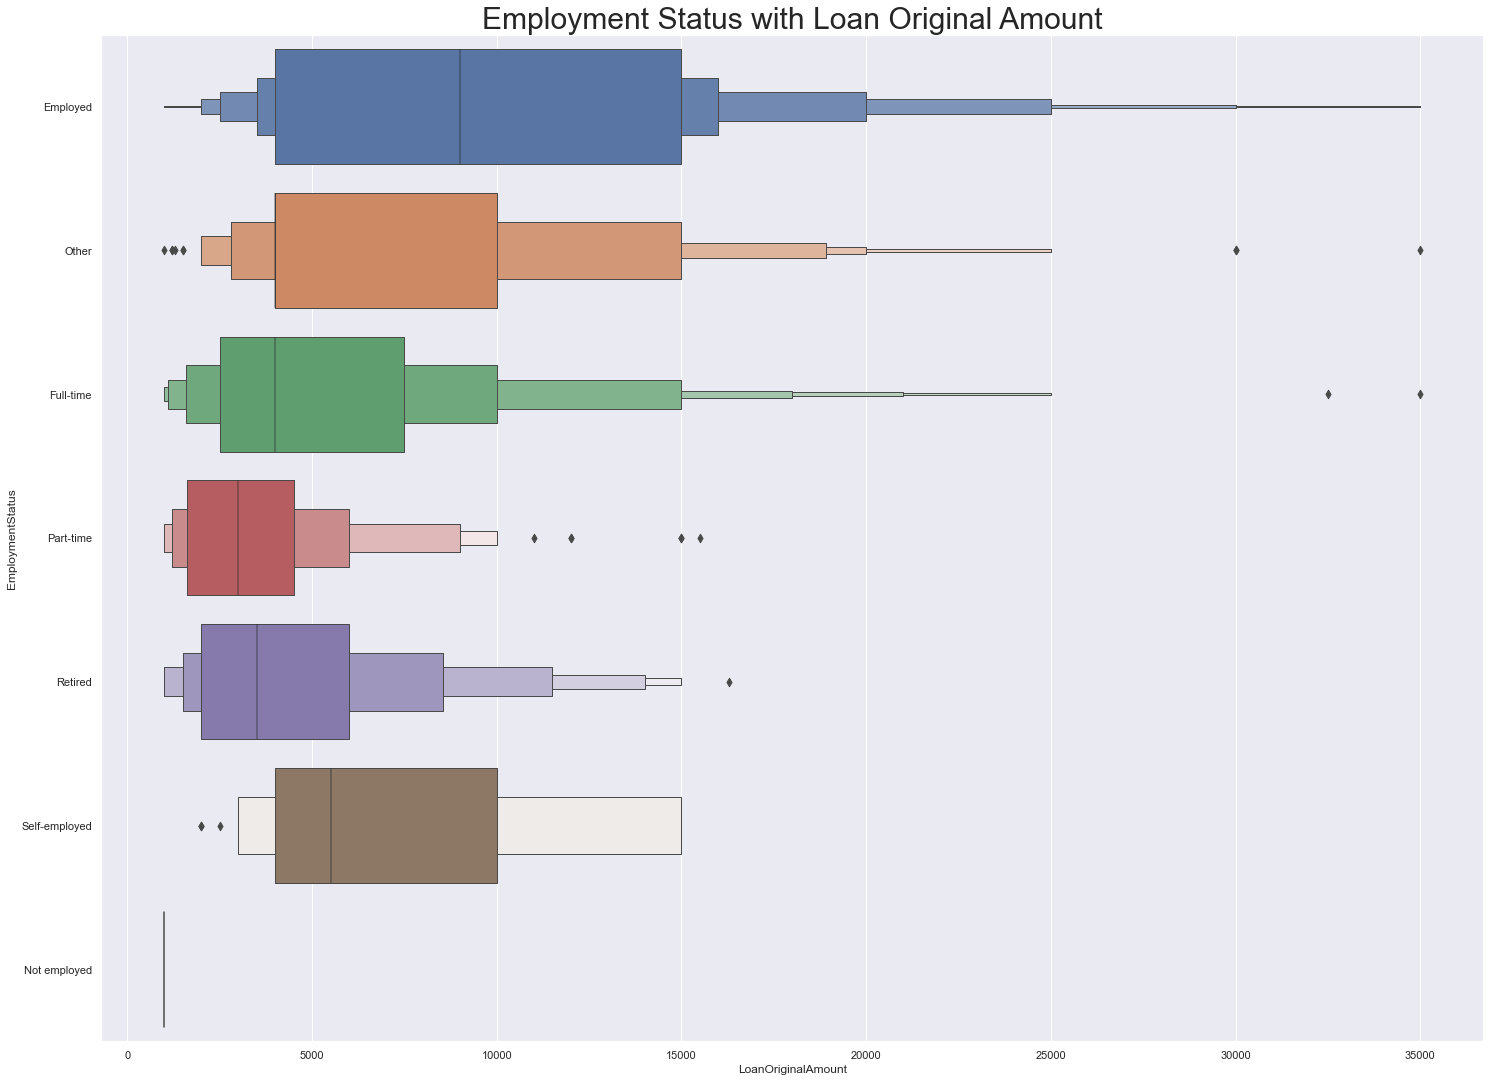

In [314]:
sns.set(rc={'figure.figsize':(20,15)})
plt.title("Employment Status with Loan Original Amount", size=30)
plt.tight_layout()

sns.boxenplot(x="LoanOriginalAmount", data=loan_df, y='EmploymentStatus');

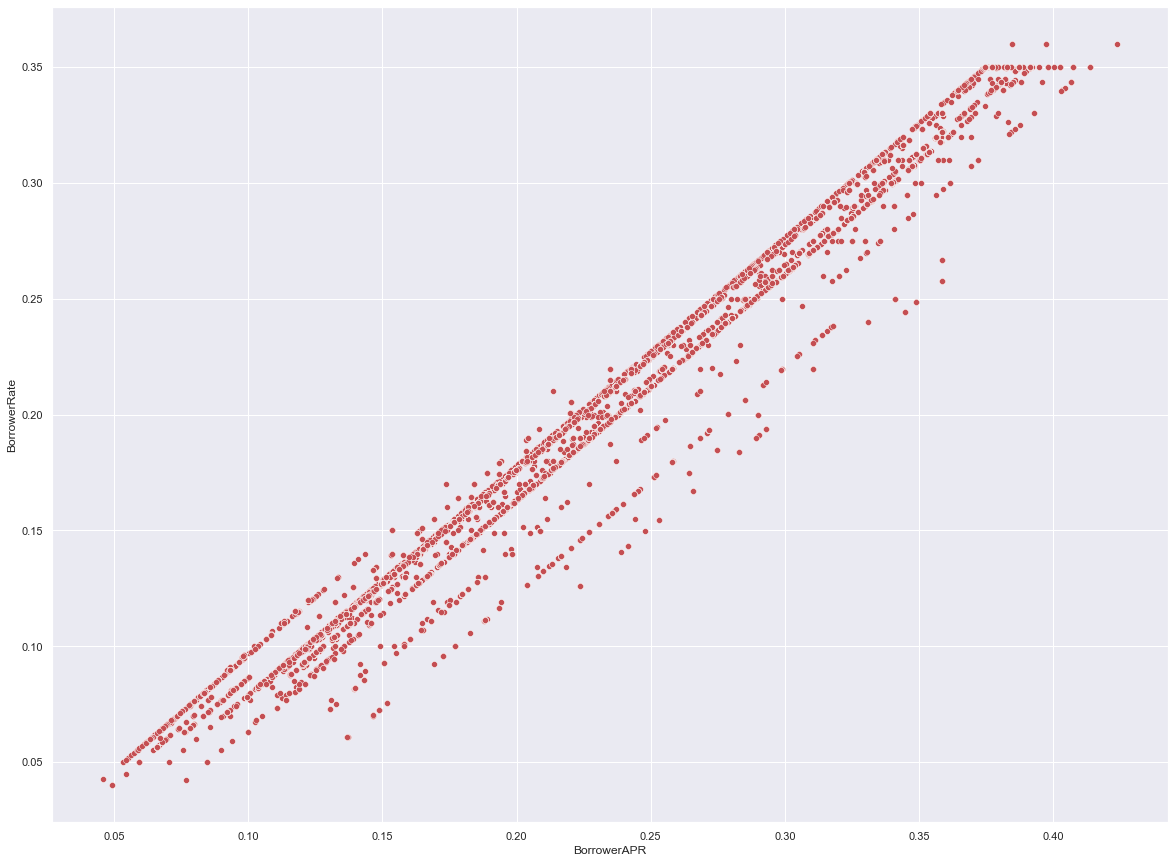

In [315]:
sns.scatterplot(data = loan_df, x = 'BorrowerAPR', y = 'BorrowerRate', color = 'r');


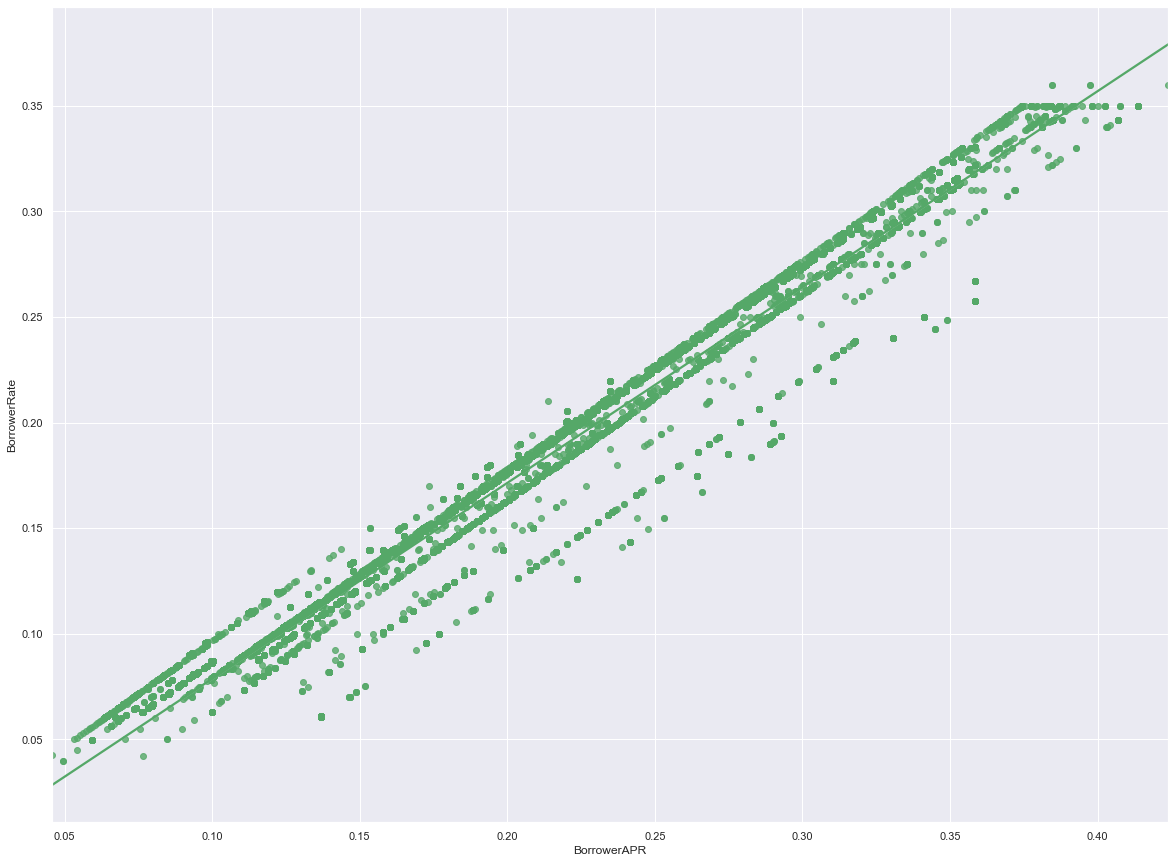

In [316]:
sns.regplot(data = loan_df, x = 'BorrowerAPR', y = 'BorrowerRate', color = 'g');


In [317]:
bb = loan_df[['BorrowerAPR', 'BorrowerRate']]
bb.corr()

,BorrowerAPR,BorrowerRate
BorrowerAPR,1.00000,0.99343
BorrowerRate,0.99343,1.00000


### Observation:

- BorrowerAPR and BorrowerRate have a strong positive correlation. which means that as one variable increses, the other also increase.

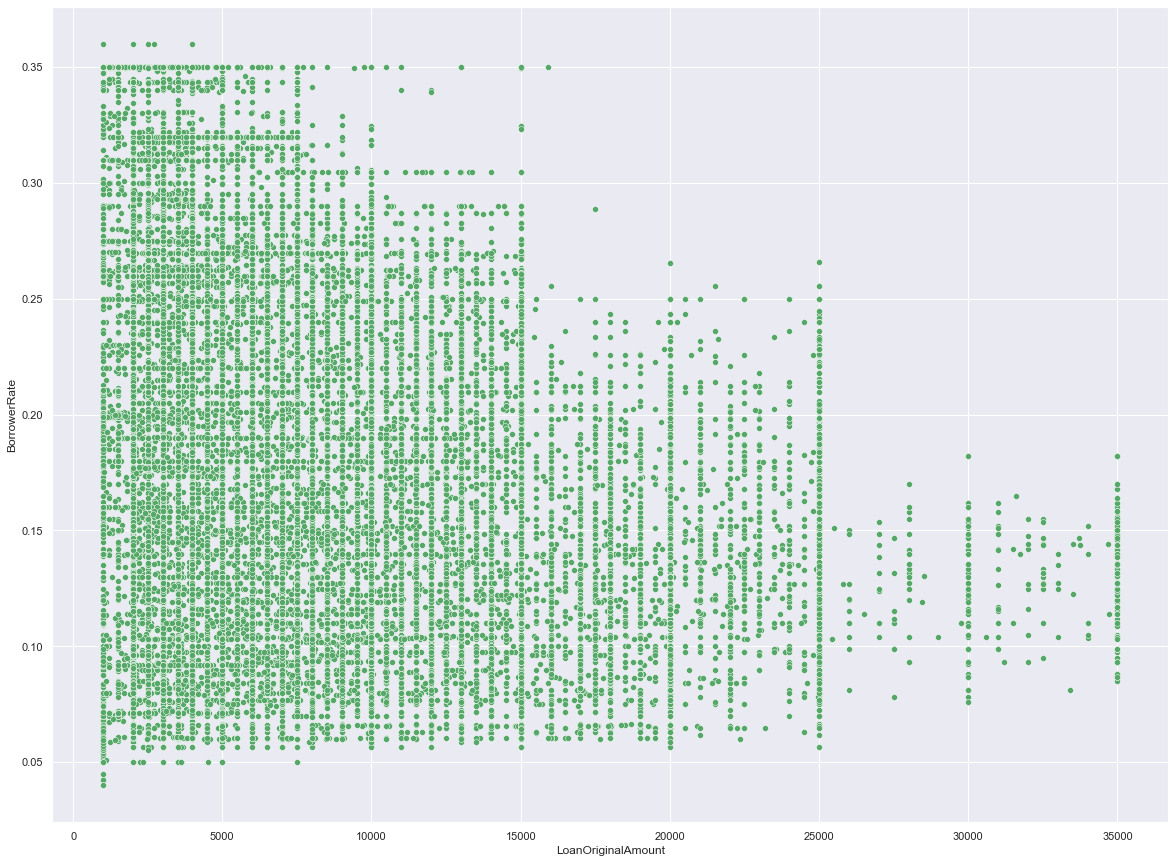

In [318]:
sns.scatterplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerRate', color='g' );


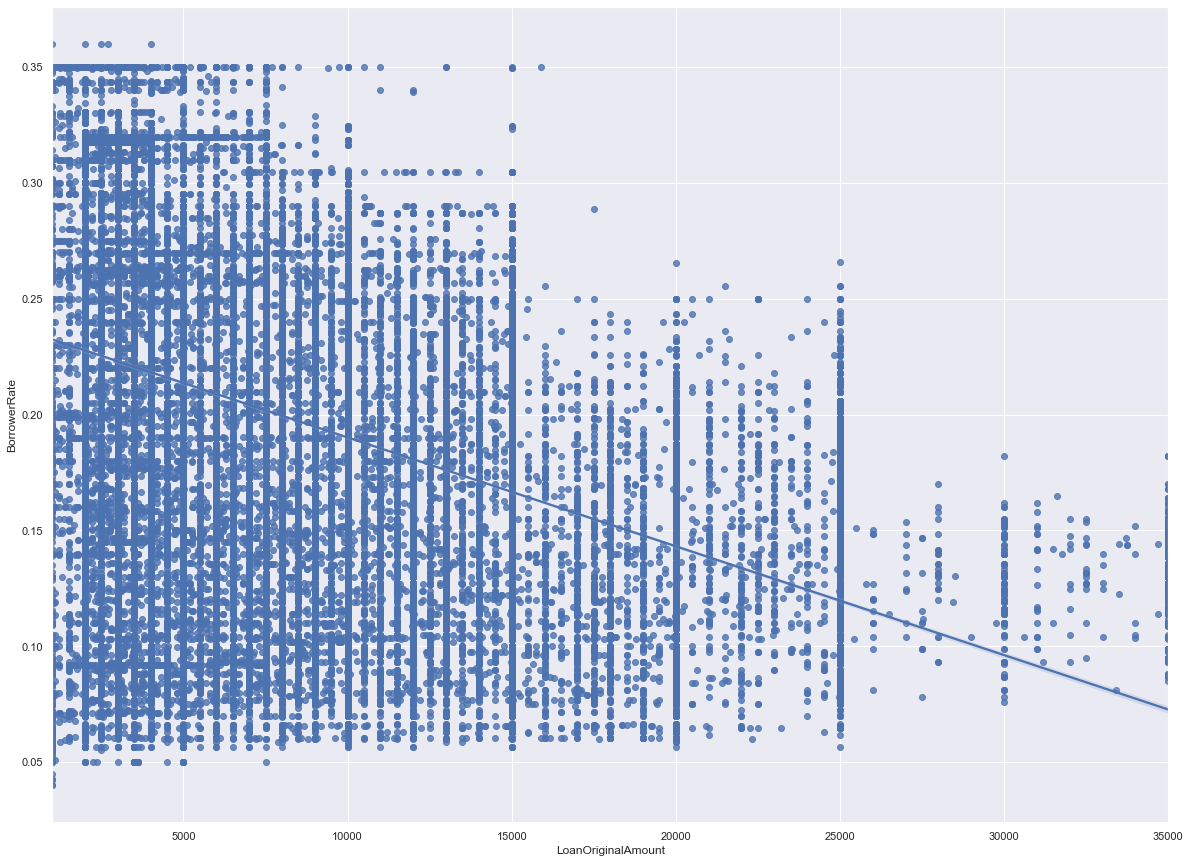

In [319]:
sns.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerRate');


In [224]:
lb = loan_df[['LoanOriginalAmount', 'BorrowerRate']]
lb.corr()

,LoanOriginalAmount,BorrowerRate
LoanOriginalAmount,1.000000,-0.413597
BorrowerRate,-0.413597,1.000000


### Observation:

- The Borrower's interest rate for any loan has a negative weak correlation with the Loan Original Amount. The loan amount has a very minimum effect on the intest rate.

In [537]:
loan_df = loan_df.copy()

In [538]:
loan_df

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month
1,1209647,10000,Current,2,CO,0.12016,0.0920,6125.000000,A,6.0,Professional,36,Employed,5,0.18,318.93,29,1,2014,Feb
3,658116,10000,Current,16,GA,0.12528,0.0974,2875.000000,A,6.0,Skilled Labor,36,Employed,1,0.15,321.45,26,158,2012,Oct
4,909464,15000,Current,2,MN,0.24614,0.2085,9583.333333,D,3.0,Executive,36,Employed,9,0.26,563.97,39,20,2013,Sept
5,1074836,15000,Current,1,NM,0.15425,0.1314,8333.333333,B,5.0,Professional,60,Employed,2,0.36,342.37,47,1,2013,Dec
6,750899,3000,Current,1,KS,0.31032,0.2712,2083.333333,E,2.0,Sales - Retail,36,Employed,0,0.27,122.67,16,1,2013,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,10000,Current,1,IL,0.22354,0.1864,4333.333333,C,4.0,Food Service Management,36,Employed,0,0.13,364.74,37,1,2013,Apr
113933,537216,2000,FinalPaymentInProgress,7,PA,0.13220,0.1110,8041.666667,A,6.0,Professional,36,Employed,4,0.11,65.57,39,22,2011,Nov
113934,1069178,10000,Current,1,TX,0.23984,0.2150,2875.000000,D,3.0,Other,60,Employed,2,0.51,273.35,25,119,2013,Dec
113935,539056,15000,Completed,2,GA,0.28408,0.2605,3875.000000,C,4.0,Food Service,60,Full-time,4,0.48,449.55,19,274,2011,Nov


In [539]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75494 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              75494 non-null  int64  
 1   LoanOriginalAmount         75494 non-null  int64  
 2   LoanStatus                 75494 non-null  object 
 3   ListingCategory (numeric)  75494 non-null  int64  
 4   BorrowerState              75494 non-null  object 
 5   BorrowerAPR                75494 non-null  float64
 6   BorrowerRate               75494 non-null  float64
 7   StatedMonthlyIncome        75494 non-null  float64
 8   ProsperRating (Alpha)      75494 non-null  object 
 9   ProsperRating (numeric)    75494 non-null  float64
 10  Occupation                 75494 non-null  object 
 11  Term                       75494 non-null  int64  
 12  EmploymentStatus           75494 non-null  object 
 13  TotalInquiries             75494 non-null  in

### *Converting EmploymentStatus (Categorical Column) to Quantitative Column*

In [540]:
EmploymentStatus = pd.get_dummies(loan_df.EmploymentStatus)

In [541]:
x = loan_df[['BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'ProsperRating (numeric)', 'TotalInquiries', 'DebtToIncomeRatio', 'TotalTrades', 'Investors']]

In [542]:
X = pd.concat([x, EmploymentStatus], axis=1)
y = loan_df.BorrowerRate

In [543]:
X

,BorrowerAPR,LoanOriginalAmount,StatedMonthlyIncome,ProsperRating (numeric),TotalInquiries,DebtToIncomeRatio,TotalTrades,Investors,Employed,Full-time,Not employed,Other,Part-time,Retired,Self-employed
1,0.12016,10000,6125.000000,6.0,5,0.18,29,1,1,0,0,0,0,0,0
3,0.12528,10000,2875.000000,6.0,1,0.15,26,158,1,0,0,0,0,0,0
4,0.24614,15000,9583.333333,3.0,9,0.26,39,20,1,0,0,0,0,0,0
5,0.15425,15000,8333.333333,5.0,2,0.36,47,1,1,0,0,0,0,0,0
6,0.31032,3000,2083.333333,2.0,0,0.27,16,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.22354,10000,4333.333333,4.0,0,0.13,37,1,1,0,0,0,0,0,0
113933,0.13220,2000,8041.666667,6.0,4,0.11,39,22,1,0,0,0,0,0,0
113934,0.23984,10000,2875.000000,3.0,2,0.51,25,119,1,0,0,0,0,0,0
113935,0.28408,15000,3875.000000,4.0,4,0.48,19,274,0,1,0,0,0,0,0


In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [545]:
def error_metrics(y_true, y_pred): 
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred)) 
    mean_squared = "Mean Squared Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred)) 
    return mean_abs, mean_squared, r2


In [546]:
model = LogisticRegression()

In [547]:
# Fitting label encoder and returning encoded labels to replace y_train values.
# from sklearn.preprocessing import LabelEncoder

# lab_enc = LabelEncoder()
# y_train = lab_enc.fit_transform(y_train)


In [548]:
#model.fit(X_train, y_train)

In [549]:
#log_pred = model.predict(X_test)

In [550]:
# Transforming labels back to original encoding.
#log_pred = lab_enc.inverse_transform(log_pred)

### *Computing the R2 Score, Mean Squared Error, Mean Absolute Error and Root Mean Squared Error for the Logistic Regression Model*

In [551]:
#error_metrics(y_test, log_pred)

### *Comparing the actual value  and the predicted value of the Borrower's interest for a loan using Logistic Regression*

In [552]:
#logistic_comparison = pd.DataFrame({"Actual": y_test, "Predicted": log_pred})

In [553]:
#logistic_comparison.sample(10)

### *Making a predictive model with Linear Regression to predict the Borrower interest for a loan*

In [554]:
linear_regression = LinearRegression()

In [555]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [556]:
linear_pred = linear_regression.predict(X_test)

### *Comparing the actual value  and the predicted value of the Borrower's interest for a loan using Linear Regression*

In [580]:
linear_comparison = pd.DataFrame({"Actual": y_test, "Predicted": linear_pred})

In [581]:
linear_comparison

,Actual,Predicted
48187,0.2045,0.198882
79737,0.1089,0.111139
78069,0.2015,0.205715
45389,0.1050,0.108151
81767,0.2750,0.273554
...,...,...
94813,0.2699,0.270914
51174,0.1299,0.135189
102549,0.1559,0.156512
7195,0.1139,0.116453


### *Computing the R2 Score, Mean Squared Error, Mean Absolute Error and Root Mean Squared Error for the Linear Regression Model.*

In [559]:
error_metrics(y_test, linear_pred)

('Mean Absolute Error: 0.005639623123024585',
 'Mean Squared Error: 6.798984948412926e-05',
 'r2 score: 0.9876654998917964')

### *Statsmodels version of fitting and predicting a model*

In [569]:
model_linear = sm.OLS(y_train, X_train)
linear_stats_model = model_linear.fit()

In [571]:
linear_stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           BorrowerRate   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 3.499e+05
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:57:45   Log-Likelihood:             2.0452e+05
No. Observations:               60395   AIC:                        -4.090e+05
Df Residuals:                   60380   BIC:                        -4.089e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BorrowerAPR                 0.9565      0.002    611.279      0.000       0.953       0.960
LoanOriginalAmount        1.59e-07   6.39e-09     24.882      0.000    1.46e-07    1.72e-07
StatedMonthlyIncome     -4.782e-08   7.25e-09     -6.592      0.000    -6.2e-08   -3.36e-08
ProsperRating (numeric)     0.0010   7.58e-05     13.219      0.000       0.001       0.001
TotalInquiries          -8.127e-06    9.2e-06     -0.884      0.377   -2.61e-05     9.9e-06
DebtToIncomeRatio          -0.0004      0.000     -4.074      0.000      -0.001      -0.000
TotalTrades              6.966e-06   3.04e-06      2.292      0.022    1.01e-06    1.29e-05
Investors                1.129e-05   3.83e-07     29.444      0.000    1.05e-05     1.2e-05
Employed                   -0.0272      0.001    -40.949      0.000      -0.028      -0.026
Full-time                  -0.0223      0.001    -33.475      0.000      -0.024      -0.021
Not employed               -0.0297      0.008     -3.622      0.000      -0.046      -0.014
Other                      -0.0275      0.001    -39.665      0.000      -0.029      -0.026
Part-time                  -0.0209      0.001    -22.815      0.000      -0.023      -0.019
Retired                    -0.0239      0.001    -28.291      0.000      -0.026      -0.022
Self-employed              -0.0268      0.002    -17.346      0.000      -0.030      -0.024
==============================================================================
Omnibus:                    35177.785   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           592990.863
Skew:                          -2.476   Prob(JB):                         0.00
Kurtosis:                      17.530   Cond. No.                     3.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [582]:
stat_pred = linear_stats_model.predict(X_test)

In [583]:
stats_comparison = pd.DataFrame({"Actual": y_test, "Predicted": stat_pred})

In [584]:
stats_comparison

,Actual,Predicted
48187,0.2045,0.198882
79737,0.1089,0.111139
78069,0.2015,0.205715
45389,0.1050,0.108151
81767,0.2750,0.273554
...,...,...
94813,0.2699,0.270914
51174,0.1299,0.135189
102549,0.1559,0.156512
7195,0.1139,0.116453


In [586]:
error_metrics(y_test, stat_pred)

('Mean Absolute Error: 0.005639623123024527',
 'Mean Squared Error: 6.798984948412858e-05',
 'r2 score: 0.9876654998917965')

### *Making a predictive model with Ridge Regression to predict the Borrower interest for a loan*

In [615]:
#common alpha for ridge
alphas = [.01, 1, 3, 10, 100, 1000, 10000]

In [617]:
ridge = RidgeCV(alphas=alphas, cv=5)
ridge_fit = ridge.fit(X_train, y_train)

In [623]:
ridge_pred = ridge_fit.predict(X_test)

In [625]:
ridge_comparison = pd.DataFrame({"Actual": y_test, "Predicted": ridge_pred})
ridge_comparison

,Actual,Predicted
48187,0.2045,0.198881
79737,0.1089,0.111140
78069,0.2015,0.205712
45389,0.1050,0.108151
81767,0.2750,0.273542
...,...,...
94813,0.2699,0.270919
51174,0.1299,0.135178
102549,0.1559,0.156511
7195,0.1139,0.116450


In [626]:
error_metrics(y_test, ridge_pred)

('Mean Absolute Error: 0.005639957951711063',
 'Mean Squared Error: 6.799107119418299e-05',
 'r2 score: 0.9876652782530826')

### *Making a predictive model with Lasso Regression to predict the Borrower interest for a loan*

In [633]:
lasso = LassoCV(cv=5, random_state=32, alphas=alphas)

In [634]:
lasso_fit = lasso.fit(X_train, y_train)

In [635]:
lasso_pred = lasso_fit.predict(X_test)

In [636]:
error_metrics(y_test, lasso_pred)

('Mean Absolute Error: 0.017562287151067734',
 'Mean Squared Error: 0.0005294267658052331',
 'r2 score: 0.9039530966804853')

In [637]:
compare = pd.DataFrame({"Actual Value": y_test, "Linear Predicted": linear_pred, "Ridge Predicted": ridge_pred, "Lasso Predicted": lasso_pred})

In [638]:
compare

,Actual Value,Linear Predicted,Ridge Predicted,Lasso Predicted
48187,0.2045,0.198882,0.198881,0.190149
79737,0.1089,0.111139,0.111140,0.124059
78069,0.2015,0.205715,0.205712,0.201393
45389,0.1050,0.108151,0.108151,0.116185
81767,0.2750,0.273554,0.273542,0.241325
...,...,...,...,...
94813,0.2699,0.270914,0.270919,0.277313
51174,0.1299,0.135189,0.135178,0.102671
102549,0.1559,0.156512,0.156511,0.157503
7195,0.1139,0.116453,0.116450,0.118021


In [640]:
compare.describe()

,Actual Value,Linear Predicted,Ridge Predicted,Lasso Predicted
count,15099.000000,15099.000000,15099.000000,15099.000000
mean,0.193755,0.193824,0.193824,0.193591
std,0.074246,0.073824,0.073822,0.064868
min,0.040000,0.032287,0.032301,0.073044
25%,0.134900,0.135939,0.135943,0.147231
50%,0.184500,0.185280,0.185283,0.195847
75%,0.255200,0.254439,0.254435,0.239510
max,0.360000,0.379917,0.379899,0.320170


### Observation:

- The error metrics when using the Linear Regression Model, Lasso and Ridge Regression are slightly the same.


- The Linear Regression Model is the most efficient model followed b the Ridge Regression Model and then the Lasso Regression Model

In [657]:
# Renaming things for clearer understanding
features = X_train.copy()
targets = y_train.copy()

#defining models we are working with
models = [
    LinearRegression(),
    RidgeCV(),
    LassoCV(),
    ElasticNetCV(),
    RandomForestRegressor()
]

# number of cross validation; 5 is standard... 10 is max
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

# Outer for loop to execute our cross validation on the above model
for model in models:
    
    # accessing model information class
    model_name = model.__class__.__name__
    
    #get the model to calculate R2 (accuracy)
    accuracies = cross_val_score(model, features, targets, scoring='r2', cv=CV)
    
    #inner for loop to fill in the entries
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

# finalizing dataframe
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'r2'])      
        
        

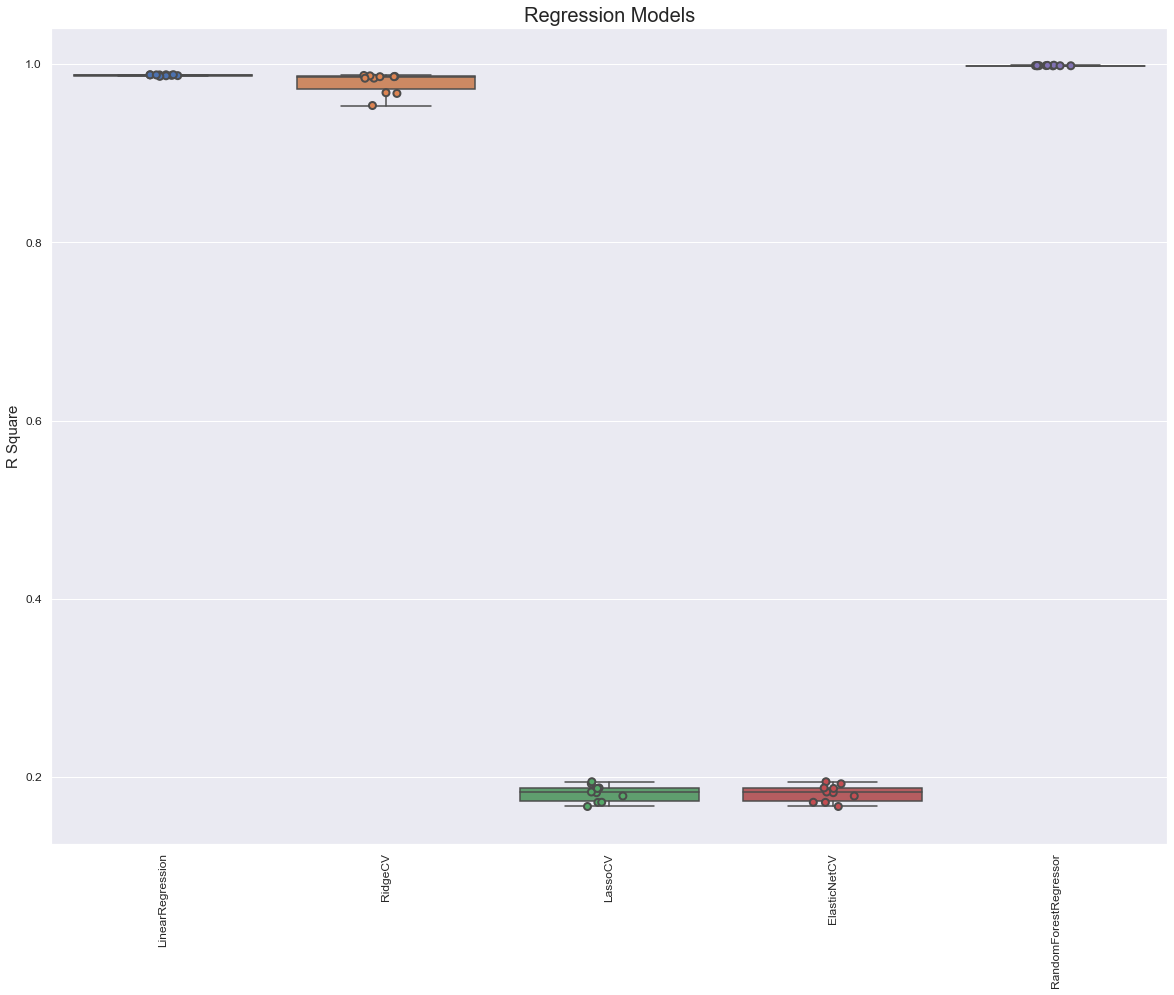

In [658]:
sns.set(color_codes=True)
sns.boxplot(x='model_name', y='r2', data=cv_df)
sns.stripplot(x='model_name',y='r2', data=cv_df, size=7, jitter=True, edgecolor='gray', linewidth=2)

plt.title("Regression Models", fontsize=20)
plt.ylabel('R Square', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0);

In [659]:
final_comp = cv_df.groupby('model_name').r2.mean().reset_index().sort_values(by='r2', ascending=False)

In [660]:
final_comp

,model_name,r2
3,RandomForestRegressor,0.998591
2,LinearRegression,0.987815
4,RidgeCV,0.979174
1,LassoCV,0.181399
0,ElasticNetCV,0.181398
